In [1]:
get_ipython().magic(u'matplotlib inline')

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


# In[2]:

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

C:\Amrendra\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


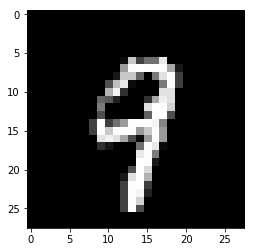

In [21]:
img = mnist.train.images[6]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

In [24]:
mnist.train.images.shape

(60000, 784)

In [28]:
encoding_dim = 32

image_size = mnist.train.images.shape[1]
#inputs_=tf.reshape(inputs_, [-1,28,28,1])

inputs_1 = tf.placeholder(tf.float32, (None, image_size), name='inputs')
inputs_=tf.reshape(inputs_1, [-1,28,28,1])

targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')
targets_=tf.reshape(targets_, [-1,28,28,1])

# Output of hidden layer
#encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

conv1 = tf.layers.conv2d(inputs_, encoding_dim, kernel_size=[3,3],activation=tf.nn.relu, padding='same')
#encoded = tf.layers.max_pooling2d(conv1, pool_size=[2, 2], strides=2)

#conv2 = tf.layers.conv2d(encoded, encoding_dim, kernel_size=[5,5],activation=tf.nn.relu)
#encoded = tf.layers.max_pooling2d(conv2, pool_size=[2, 2], strides=2)


#encoded_flat= tf.reshape(conv1,[-1, 7*7*64])
dense = tf.layers.dense(inputs=conv1, units=1, activation=tf.nn.relu)
# Output layer logits
logits = tf.layers.dense(dense,units=1 , activation=None)
# Sigmoid output from
decoded = tf.nn.sigmoid(logits, name='output')

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)


In [30]:
# ## Training

# In[5]:

# Create the session
sess = tf.Session()


# Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss and the test loss afterwards. 
# 
# Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

# In[6]:

epochs = 20
batch_size = 1
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_1: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))



ValueError: Cannot feed value of shape (1, 784) for Tensor 'Reshape_17:0', which has shape '(?, 28, 28, 1)'

NameError: name 'encoded' is not defined

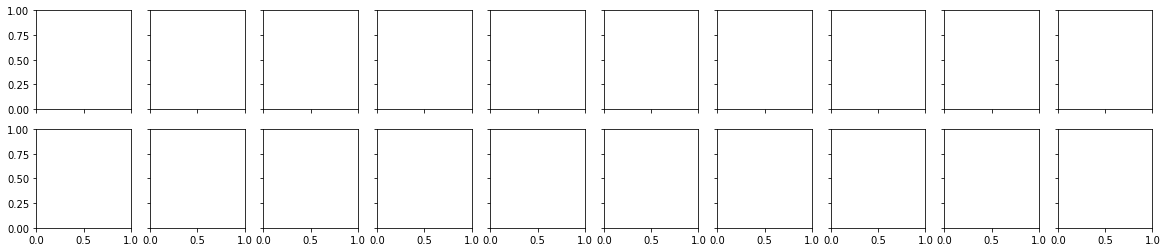

In [17]:
# Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

# In[7]:

fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)


# In[8]:

sess.close()